In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
x = np.random.rand(1000)

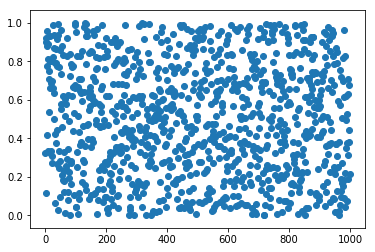

In [9]:
plt.scatter(range(len(x)), x)

In [10]:
old_min = 0
old_max = 1
new_min = -1
new_max = 1

new_x = ( (x - old_min) / (old_max - old_min) ) * (new_max - new_min) + new_min

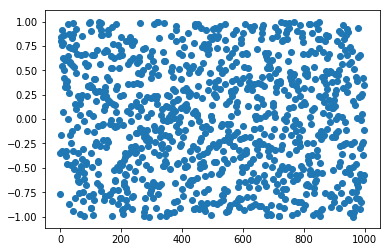

In [11]:
plt.scatter(range(len(new_x)), new_x)

In [12]:
from PIL import Image

In [14]:
im = Image.open(f'../data/temp_xception_clustering/training/spiral/100008.jpg')
im_arr = np.array(im)

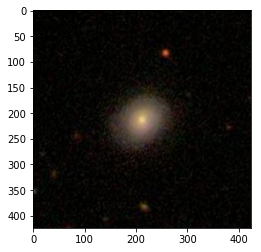

In [15]:
plt.imshow(im_arr)

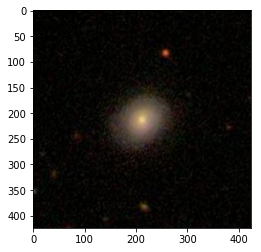

In [16]:
plt.imshow(im_arr/255.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


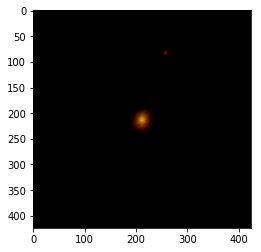

In [19]:
old_min = 0.
old_max = 255.
new_min = -1.
new_max = 1.

new_im_arr = ( (im_arr - old_min) / (old_max - old_min) ) * (new_max - new_min) + new_min

plt.imshow(new_im_arr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


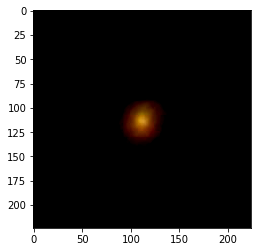

In [43]:
old_min = 0.
old_max = 255.
new_min = -1.
new_max = 1.

new_im_arr = ( (im_arr - old_min) / (old_max - old_min) ) * (new_max - new_min) + new_min

plt.imshow(new_im_arr[100:-100, 100:-100])

In [21]:
new_im_arr.min()

-1.0

In [22]:
im_arr.shape

(424, 424, 3)

In [23]:
target_shape = (224, 224, 3)

In [25]:
424 - 224

200

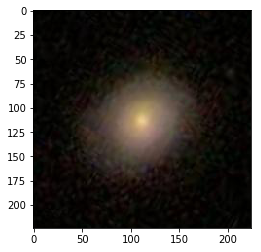

In [26]:
plt.imshow(im_arr[100:-100, 100:-100, :])

In [39]:
def get_difference(orig_size, target_size):
    orig_size, target_size = list(orig_size), list(target_size)
    ret_ls = []
    for o, t in zip(orig_size, target_size):
        ret_ls.append(o - t)
    return ret_ls

def crop_image(image, orig_size, target_size):
    crop_sizes = get_difference(orig_size, target_size)
    height_dif, width_dif = crop_sizes[0] // 2, crop_sizes[1] // 2
    return image[height_dif:(height_dif + target_size[0]), width_dif:(width_dif + target_size[1]), :]

def range_scaling(image):
    old_min, old_max = 0., 255.
    new_min, new_max = -1., 1.
    return ((image - old_min)/(old_max - old_min))*(new_max - new_min) + new_min

def image_preprocessing_function(image):
    """
    image is a 3-D image tensor (numpy array).
    """
    target_image_size = (224, 224, 3)
    cropped_image = crop_image(image, image.shape, target_image_size)
    return range_scaling(cropped_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


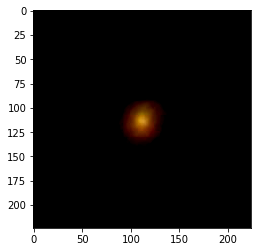

In [42]:
plt.imshow(image_preprocessing_function(im_arr))